# Laborator 2: Căutare Tabu și Călire Simulată

## Introducere

În laboratorul anterior, am explorat metoda [hill climbing](https://en.wikipedia.org/wiki/Hill_climbing). Am observat că, deși simplă și intuitivă, aceasta are dezavantaje semnificative:
1.  **Dependența de punctul de start:** Soluția finală depinde puternic de configurația inițială.
2.  **Blocarea în optimi locali:** Algoritmul se oprește adesea la prima soluție "bună" pe care o găsește, chiar dacă există soluții mult mai bune în altă parte a spațiului de căutare. Nu are un mecanism pentru a "coborî" temporar de pe un deal pentru a explora alte văi.

Aceste limitări fac ca *hill climbing*-ul simplu să fie inadecvat pentru multe probleme complexe din lumea reală, unde peisajul funcției obiectiv este accidentat, cu numeroase vârfuri (optimi locali) și văi.

Ca răspuns la aceste provocări, au fost dezvoltate **metaheuristici** mai avansate. Acestea sunt strategii de optimizare de nivel înalt care ghidează un proces de căutare, încercând să echilibreze eficient **explorarea** (căutarea în zone noi, diverse ale spațiului de soluții) și **exploatarea** (rafinarea soluțiilor promițătoare deja găsite). Scopul este de a găsi soluții de înaltă calitate, apropiate de optimul global, reducând în același timp dependența de punctul de start.

În acest laborator, vom studia două astfel de tehnici puternice:

1.  [Căutarea Tabu](https://en.wikipedia.org/wiki/Tabu_search) (Tabu Search - TS): utilizează o "memorie" (listă tabu) pentru a evita revenirea la soluții explorate recent, forțând căutarea să **exploreze** noi regiuni.
2.  [Călirea Simulată](https://en.wikipedia.org/wiki/Simulated_annealing) (Simulated Annealing - SA): se inspiră dintr-un proces fizic (călirea metalelor) și permite, cu o anumită probabilitate, acceptarea unor mutări către soluții mai slabe, pentru a "evada" din optimi locali.



Aceste metode sunt fundamentale în optimizarea modernă, depășind simpla teorie academică și găsind aplicații concrete într-o multitudine de probleme complexe din lumea reală. Versatilitatea lor le permite să abordeze provocări dintr-o gamă impresionantă de domenii:

*   **Călirea Simulată (SA)** se dovedește extrem de utilă în:
    *   **Optimizarea logistică și a lanțurilor de aprovizionare:** Găsirea rutelor optime pentru transport (cum ar fi Problema Comis-Voiajorului - TSP), planificarea livrărilor și gestionarea eficientă a stocurilor [1, 3, 5, 6].
    *   **Proiectarea circuitelor integrate (VLSI):** Optimizarea așezării componentelor (placement), planificarea spațiului pe cip (floorplanning) și trasarea conexiunilor dintre acestea (routing) pentru a minimiza întârzierile și consumul de energie [1].
    *   **Planificarea producției și alocarea resurselor:** Stabilirea programului optim de fabricație și asignarea eficientă a mașinilor sau personalului în medii industriale [2, 4].
    *   **Învățare automată (Machine Learning):** Căutarea configurațiilor optime de hiperparametri pentru a îmbunătăți acuratețea și performanța modelelor predictive [3].
    *   **Optimizarea portofoliilor financiare:** Echilibrarea riscului și a randamentului așteptat în alocarea investițiilor [3].

*   **Căutarea Tabu (TS)** este esențială pentru:
    *   **Rutarea vehiculelor (Vehicle Routing Problem - VRP):** Planificarea rutelor eficiente pentru flote de vehicule în scopul livrărilor, colectărilor sau prestării de servicii, minimizând distanțele sau costurile [5, 7].
    *   **Planificarea producției și a operațiilor (Scheduling):** Optimizarea secvenței operațiilor pe mașini în ateliere complexe (Job-Shop, Flow-Shop) pentru a reduce timpul total de producție (makespan) [7].
    *   **Proiectarea rețelelor de telecomunicații:** Stabilirea topologiei și capacității rețelelor pentru a asigura performanță ridicată și costuri minime [5].
    *   **Alocarea resurselor și planificare:** Asignarea optimă a personalului, echipamentelor sau a altor resurse limitate în organizații mari sau proiecte complexe [5, 7].
    *   **Optimizarea distribuției energiei:** Planificarea fluxurilor de energie în rețelele electrice pentru a crește eficiența și fiabilitatea sistemului [5].


**Referințe**

*  **[1]** Georgia Tech: Real-World Applications (SA: VLSI, TSP, etc.): https://sites.gatech.edu/omscs7641/2024/02/19/simulated-annealing-methods-and-real-world-applications/

* **[2]** Eyelit: Simulated Annealing in Manufacturing (SA: Producție, Resurse):  https://eyelit.ai/simulated-annealing-algorithm/

* **[3]** Eurystic Solutions: Algorithm Optimization Inspired by Physics (SA: Lanț Aprovizionare, ML, Finanțe): https://eurysticsolutions.com/2024/11/07/simulated-annealing-algorithm-optimization-inspired-by-physics/

* **[4]** MSDN Magazine: Simulated Annealing and Testing (SA: Producție/Scheduling): https://learn.microsoft.com/en-us/archive/msdn-magazine/2012/january/test-run-simulated-annealing-and-testing

* **[5]** Wikipedia: Tabu Search (TS: TSP, Rutare, Telecom, VLSI, Resurse, Energie, etc.): https://en.wikipedia.org/wiki/Tabu_search

* **[6]** Wikipedia: Simulated Annealing (SA: TSP, Job-Shop): https://en.wikipedia.org/wiki/Simulated_annealing

* **[7]** JIHMSP: Industrial Applications of Tabu Search (TS: Producție, Scheduling, Rutare, Resurse): https://bit.kuas.edu.tw/~jihmsp/2024/vol15/N3/05.JIHMSP-240802.pdf


Aceste exemple ilustrează doar o fracțiune din impactul TS și SA, exemplificând capacitatea lor de a oferi soluții robuste și eficiente pentru probleme de optimizare întâlnite în inginerie, logistică, finanțe, producție, informatică și multe alte sectoare.

## 1. Căutarea Tabu ([Tabu Search](https://en.wikipedia.org/wiki/Tabu_search) - TS)

**Ideea de bază:** Imaginați-vă că explorăm un labirint în căutarea ieșirii (optimul). Pentru a nu merge în cerc și a nu revizita imediat aceleași fundături (optimi locali), ne notăm ultimele câteva intersecții pe unde am trecut și le evităm pentru o perioadă. Aceasta este esența Căutării Tabu.

Introdusă de Fred Glover în [1986](https://www.sciencedirect.com/science/article/abs/pii/0305054886900481?via%3Dihub), Căutarea Tabu (TS) este o metaheuristică ce îmbunătățește căutarea locală (asemănătoare cu hill climbing) prin introducerea unei **liste tabu**. Această listă conține atribute ale soluțiilor vizitate recent (de exemplu, mutările efectuate sau chiar soluțiile complete) care sunt **interzise** (tabu) temporar.

**Cum funcționează?**

1.  **Start:** Pornim de la o soluție inițială `s0`. Aceasta devine soluția curentă `bestCandidate` și cea mai bună soluție găsită până acum `sBest`. Soluția `s0` este adăugată în lista tabu.
2.  **Generare Vecini:** La fiecare pas, generăm vecinii soluției curente `bestCandidate` (similar cu hill climbing). Vecinii sunt soluții care pot fi obținute din cea curentă printr-o mică modificare (o "mutare").
3.  **Selectare Cel Mai Bun Vecin (cu restricții):** Căutăm cel mai bun vecin *dintre cei care nu sunt tabu*. Spre deosebire de hill climbing, TS **acceptă** acest cel mai bun vecin *ne-tabu* ca nou `bestCandidate`, **chiar dacă este mai slab** decât `bestCandidate` anterior. Acest mecanism permite algoritmului să "coboare" de pe un optim local.
4.  **Actualizare sBest:** Dacă noul `bestCandidate` este mai bun decât `sBest`, actualizăm `sBest`.
5.  **Actualizare Lista Tabu:** Adăugăm informația relevantă despre mutarea făcută sau despre noul `bestCandidate` în lista tabu. De obicei, lista tabu are o dimensiune fixă (`maxTabuSize`). Când lista este plină, cea mai veche intrare este ștearsă pentru a face loc celei noi (comportament FIFO - First-In, First-Out).
6.  **Oprire:** Repetăm pașii 2-5 până când o condiție de oprire este îndeplinită (de ex., număr maxim de iterații, timp scurs, nu s-a mai găsit o îmbunătățire pentru un număr de pași).
7.  **Rezultat:** Returnăm `sBest`.

**Pseudocod:**

```cpp
// Initializare
sBest = s0; // Cea mai bună soluție găsită global
bestCandidate = s0; // Soluția curentă de la care explorăm
tabuList = []; // Lista de atribute/soluții interzise
tabuList.push(s0); // Adaugăm soluția inițială în listă
maxTabuSize = ...; // Dimensiunea maximă a listei tabu (un parametru important!)

while (!stoppingCondition()){
    // 1. Generează vecinii soluției curente
    // Explorarea poate fi exhaustivă sau parțială (eșantionare)
    sNeighborhood = getNeighbors(bestCandidate);

    // 2. Găsește cel mai bun vecin care NU este în lista tabu
    bestCandidateNeighbor = null;
    for (sCandidate in sNeighborhood) {
        // Verifică dacă vecinul NU este tabu (sau îndeplinește criteriul de aspirație - vezi mai jos)
        if (!tabuList.contains(sCandidate)) {
            // Dacă e primul vecin valid sau e mai bun decât cel mai bun vecin valid găsit până acum
            if (bestCandidateNeighbor == null || fitness(sCandidate) > fitness(bestCandidateNeighbor)) {
                 bestCandidateNeighbor = sCandidate;
            }
        }
    }

    // Dacă nu am găsit niciun vecin valid (toți erau tabu), ne putem opri sau aplica o strategie (ex: alegem cel mai vechi tabu)
    // Aici presupunem că găsim mereu un vecin valid pentru simplitate, sau că algoritmul gestionează acest caz.
    // În implementarea din pseudocodul inițial, se alegea necondiționat primul vecin, apoi se căuta unul mai bun ne-tabu.
    // Abordarea de aici (căutarea celui mai bun *ne-tabu*) este mai comună.

    // Actualizăm soluția curentă cu cel mai bun vecin *ne-tabu* găsit
    // Chiar dacă fitness(bestCandidateNeighbor) < fitness(bestCandidate)! Acesta e pasul cheie pt. a ieși din optimi locali.
    if (bestCandidateNeighbor != null) { // Verificăm că am găsit un vecin valid
        bestCandidate = bestCandidateNeighbor;
    } else {
        // Strategie de backup dacă toți vecinii sunt tabu (rar, dar posibil cu liste mari)
        // De exemplu, am putea alege cel mai bun dintre vecinii tabu (relaxarea restricției) sau ne oprim.
        // În pseudocodul inițial, se lua primul vecin necondiționat, evitând acest blocaj.
        // O altă variantă: dacă toți sunt tabu, alege-l pe cel mai bun dintre ei.
        // Pentru simplificare, vom presupune că găsim mereu un vecin ne-tabu sau că `getNeighbors` returnează și soluția curentă dacă nu găsește alternative.
         bestCandidate = sNeighborhood[0]; // Revenim la abordarea simplificată pt a asigura progresul
         // Căutăm apoi cel mai bun vecin ne-tabu
         for (sCandidate in sNeighborhood)
             if ( (!tabuList.contains(sCandidate)) && (fitness(sCandidate) > fitness(bestCandidate)) )
                 bestCandidate = sCandidate;
    }


    // 3. Actualizăm cea mai bună soluție globală, dacă e cazul
    if (fitness(bestCandidate) > fitness(sBest)) {
        sBest = bestCandidate;
    }

    // 4. Adaugăm soluția/mutarea curentă în lista tabu
    tabuList.push(bestCandidate); // Sau atribute ale mutării

    // 5. Menținem dimensiunea listei tabu
    if (tabuList.size > maxTabuSize) {
        tabuList.removeFirst(); // Ștergem cel mai vechi element
    }
}
return sBest; // Returnăm cea mai bună soluție găsită
```

**Durata tabu (`maxTabuSize`) și [echilibrul explorare-exploatare](https://en.wikipedia.org/wiki/Exploration%E2%80%93exploitation_dilemma):**

*   **Listă tabu scurtă:**
    *   Permite revenirea rapidă în zone recent vizitate.
    *   Favorizează **exploatarea** intensivă în jurul optimilor locali promițători.
    *   Risc mai mare de ciclare între câteva soluții dacă durata e prea mică.
    *   Utilă când bănuim că optimul global este aproape de optimi locali buni.
*   **Listă tabu lungă:**
    *   Interzice revenirea la soluții pentru mai mult timp.
    *   Forțează algoritmul să se mute în regiuni noi, neexplorate.
    *   Favorizează **explorarea** extensivă a spațiului de căutare.
    *   Risc de a "sări" peste regiuni bune dacă durata e prea mare.
    *   Utilă pentru peisaje complexe, multimodale, unde optimii locali sunt înșelători.

Alegerea `maxTabuSize` este crucială și depinde de problemă. Adesea, se alege experimental sau se folosesc strategii adaptive unde durata tabu se modifică dinamic.

**Criterii de Aspirație (Opțional, dar important în practică):**
Uneori, o mutare tabu poate duce la o soluție excepțional de bună (mai bună decât `sBest`). Ar fi păcat să o ignorăm doar pentru că e tabu. Criteriile de aspirație permit "suprascrierea" statutului tabu în astfel de cazuri excepționale. Cel mai comun criteriu: dacă un vecin `sCandidate` este tabu, dar `fitness(sCandidate) > fitness(sBest)`, atunci acceptăm mutarea oricum.

### Exemplu: Optimizare Binară Cuadratică Neconstrânsă (QUBO)

QUBO este o clasă de probleme de optimizare unde dorim să minimizăm o funcție cuadratică de variabile binare (0 sau 1).
Formal, pentru o matrice simetrică $Q \in \mathbb{R}^{n \times n}$, căutăm vectorul binar $x \in \{0, 1\}^{n}$ care minimizează:

$$ f_Q(x) = x^T Q x = \sum_{i} Q_{ii} x_i + \sum_{i<j} (Q_{ij} + Q_{ji}) x_i x_j $$

(Notă: Deoarece $x_i^2 = x_i$ pentru $x_i \in \{0, 1\}$, termenii diagonali $Q_{ii}x_i^2$ devin $Q_{ii}x_i$).


Foarte multe probleme (ex: Partition Problem, Max-Cut, TSP în anumite formulări) pot fi [transformate în format QUBO](https://arxiv.org/pdf/1811.11538.pdf). Datorită legăturii strânse cu [modelele Ising](https://en.wikipedia.org/wiki/Ising_model), QUBO este foarte des folosit și în [calculul cuantic adiabatic](https://en.wikipedia.org/wiki/Adiabatic_quantum_computation).


Vom folosi biblioteca [`dwave-tabu`](https://docs.ocean.dwavesys.com/projects/tabu/en/latest/), care implementează un *sampler* ("rezolvitor") bazat pe TS, pentru a rezolva probleme QUBO.

**Instalare biblioteci:**

In [ ]:
# Instalăm bibliotecile necesare (dacă nu sunt deja prezente)
!pip install dwave-tabu pyqubo pandas matplotlib numpy | grep -v 'already satisfied'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 72.5 MB/s eta 0:00:00


**Exemplul 1: Minimizarea unei funcții simple**

Dorim să găsim minimul (vectorul $x$ binar) pentru funcția:
$$ y = -5x_1 -3x_2 -8x_3 -6x_4 +4x_1x_2 +8x_1x_3 +2x_2x_3 +10x_3x_4 $$

Putem defini matricea $Q$ (sau echivalent, un dicționar de coeficienți) manual sau folosind `pyqubo`.

In [ ]:
from tabu import TabuSampler
from pyqubo import Binary, Array, Spin

# --- Varianta 1: Definire manuală a dicționarului QUBO ---
# Cheile sunt tupluri de variabile. ('x1', 'x1') corespunde lui Q_11, ('x1', 'x2') corespunde lui Q_12 (și Q_21 implicit).
qubo_manual = {
    ('x1', 'x1'): -5, ('x2', 'x2'): -3, ('x3', 'x3'): -8, ('x4', 'x4'): -6, # Coeficienți liniari (diagonala Q)
    ('x1', 'x2'): 4, ('x1', 'x3'): 8, ('x2', 'x3'): 2, ('x3', 'x4'): 10   # Coeficienți cuadratici (extragonala Q)
}

# Creăm un obiect TabuSampler (implementarea TS)
sampler_manual = TabuSampler()

# Rulăm TS pe problema QUBO definită manual
# .sample_qubo returnează un set de soluții găsite, sortate după energie (valoarea funcției)
response_manual = sampler_manual.sample_qubo(qubo_manual)

# Afișăm rezultatul. 'response_manual' conține mai multe informații.
# '.first' ne dă cea mai bună soluție găsită (sample) și energia ei (energy).
print("--- Rezultat (Manual QUBO) ---")
print(response_manual)
print(f"Cea mai bună soluție găsită: {response_manual.first.sample}")
print(f"Valoarea minimă a funcției: {response_manual.first.energy}")

--- Rezultat (Manual QUBO) ---
  x1 x2 x3 x4 energy num_oc. num_re.
0  1  0  0  1  -11.0       1       2
['BINARY', 1 rows, 1 samples, 4 variables]
Cea mai bună soluție găsită: {'x1': np.int8(1), 'x2': np.int8(0), 'x3': np.int8(0), 'x4': np.int8(1)}
Valoarea minimă a funcției: -11.0


In [ ]:
# --- Varianta 2: Generare automată a QUBO cu PyQUBO ---
# Definim variabile binare simbolice
x1, x2, x3, x4 = Binary("x1"), Binary("x2"), Binary("x3"), Binary("x4")

# Definim expresia simbolică
y = -5*x1 -3*x2 -8*x3 -6*x4 +4*x1*x2 +8*x1*x3 + 2*x2*x3 + 10*x3*x4

# Compilăm modelul într-un format intern și apoi extragem QUBO-ul
model = y.compile()
qubo_auto, offset = model.to_qubo()
# 'offset' este o constantă adăugată la funcție, importantă dacă pornim de la alte formulări (ex: Ising)
# 'qubo_auto' este dicționarul de coeficienți, similar cu cel manual

print("\n--- QUBO generat automat ---")
print(qubo_auto)
print(f"Offset: {offset}") # În acest caz, offset-ul este 0

# Creăm un nou sampler (sau îl refolosim pe cel vechi)
sampler_auto = TabuSampler()

# Rulăm TS pe QUBO-ul generat automat
response_auto = sampler_auto.sample_qubo(qubo_auto)

print("\n--- Rezultat (Auto QUBO) ---")
print(response_auto)
print(f"Cea mai bună soluție găsită: {response_auto.first.sample}")
print(f"Valoarea minimă a funcției: {response_auto.first.energy}") # Ar trebui să fie identică cu cea manuală



--- QUBO generat automat ---
{('x4', 'x4'): -6.0, ('x3', 'x4'): 10.0, ('x3', 'x3'): -8.0, ('x2', 'x1'): 4.0, ('x3', 'x2'): 2.0, ('x3', 'x1'): 8.0, ('x1', 'x1'): -5.0, ('x2', 'x2'): -3.0}
Offset: 0.0

--- Rezultat (Auto QUBO) ---
  x1 x2 x3 x4 energy num_oc. num_re.
0  1  0  0  1  -11.0       1       2
['BINARY', 1 rows, 1 samples, 4 variables]
Cea mai bună soluție găsită: {'x1': np.int8(1), 'x2': np.int8(0), 'x3': np.int8(0), 'x4': np.int8(1)}
Valoarea minimă a funcției: -11.0


Observăm că în ambele cazuri, TS găsește soluția optimă $x = \{'x1': 0, 'x2': 1, 'x3': 1, 'x4': 0\}$ (sau o permutare echivalentă dacă Q nu e unic specificat), cu valoarea minimă de -11.


**Exemplul 2: [Problema partiționării](https://en.wikipedia.org/wiki/Partition_problem) (Partition problem)**

https://www.geeksforgeeks.org/partition-problem-dp-18/

Dată o mulțime de numere $S = \{n_1, n_2, ..., n_k\}$, dorim să o împărțim în două submulțimi $S_1$ și $S_2$ astfel încât diferența dintre sumele elementelor din cele două submulțimi să fie minimă (ideal, zero).
$$ \min \left| \sum_{n_i \in S_1} n_i - \sum_{n_j \in S_2} n_j \right| $$

Aceasta poate fi formulată ca o problemă QUBO. O modalitate este să asociem fiecărui număr $n_i$ o variabilă de tip [*spin*](https://en.wikipedia.org/wiki/Ising_model) $s_i \in \{-1, +1\}$. Dacă $s_i = +1$, numărul $n_i$ merge în $S_1$. Dacă $s_i = -1$, numărul $n_i$ merge în $S_2$. Dorim să minimizăm pătratul sumei ponderate:
$$ \min H = \left( \sum_{i=1}^{k} n_i s_i \right)^2 $$
Când suma este exact 0, $H$ este minim (0), însemnând că cele două partiții au sume egale. PyQUBO ne permite să lucrăm direct cu variabile spin și să le convertim automat în QUBO (variabile binare 0/1).

Considerăm $S = \{25, 7, 13, 31, 42, 17, 21, 10\}$.


In [ ]:
import numpy as np

# Definim lista de numere
numbers = [25, 7, 13, 31, 42, 17, 21, 10]
print(f"Lista de numere: {numbers}")
print(f"Suma totală: {sum(numbers)}") # Suma este 166. O partiție perfectă ar avea suma 83 în fiecare subset.

# Creăm un array de variabile de tip SPIN (-1, +1), câte una pentru fiecare număr
s = Array.create('s', shape=len(numbers), vartype='SPIN')

# Definim funcția obiectiv (Hamiltonianul H) pe care dorim să o minimizăm
# H = (suma ponderată)^2
H = sum(n * s_i for s_i, n in zip(s, numbers))**2

# Compilăm modelul și îl transformăm în QUBO
model_pp = H.compile()
qubo_pp, offset_pp = model_pp.to_qubo()

print("\n--- QUBO pentru Partition problem (fragment) ---")
# Afișăm doar o parte din QUBO, poate fi mare
print(dict(list(qubo_pp.items())[:10]))
print(f"Offset: {offset_pp}")

# Folosim TabuSampler pentru a găsi configurația de spin (convertită la 0/1) care minimizează H
sampler_pp = TabuSampler()
response_pp = sampler_pp.sample_qubo(qubo_pp)

print("\n--- Rezultat Partition problem (TS) ---")
print(response_pp)

# Extragem cea mai bună soluție (configurația de variabile 0/1)
best_solution_qubo = response_pp.first.sample
# Extragem energia (valoarea minimă a lui H)
min_energy = response_pp.first.energy + offset_pp # Adunăm offset-ul pentru valoarea reală a lui H

print(f"\nValoarea minimă a lui H (ideal 0): {min_energy}")

# --- Verificarea rezultatului ---
# Convertim înapoi la spin +/-1 dacă e necesar (deși putem lucra direct cu 0/1)
# PyQUBO face maparea: Spin -1 -> Binar 0, Spin +1 -> Binar 1
# Deci, 0 înseamnă S2, 1 înseamnă S1 (sau invers, depinde de interpretare)

S1 = []
S2 = []
spin_assignment = {} # Stocăm asignarea spin pentru claritate

for i in range(len(numbers)):
    var_name = f's[{i}]'
    # Presupunem că PyQUBO mapează spin +1 la binar 1 și spin -1 la binar 0
    if best_solution_qubo[var_name] == 1: # Atribuit la S1 (spin +1)
        S1.append(numbers[i])
        spin_assignment[var_name] = +1
    else: # Atribuit la S2 (spin -1 / binar 0)
        S2.append(numbers[i])
        spin_assignment[var_name] = -1

print("\n--- Verificare Partiție Găsită ---")
print(f"Asignare spin: {spin_assignment}") # Afișează asignarea spin -1/+1
print(f"Submulțimea S1: {S1}, Suma: {sum(S1)}")
print(f"Submulțimea S2: {S2}, Suma: {sum(S2)}")
print(f"Diferența absolută a sumelor: {abs(sum(S1) - sum(S2))}")

# Verificăm dacă valoarea H calculată manual corespunde cu min_energy
calculated_h = (sum(n * spin_assignment[f's[{i}]'] for i, n in enumerate(numbers)))**2
print(f"Valoarea H calculată manual: {calculated_h}") # Ar trebui să fie egală cu min_energy


Lista de numere: [25, 7, 13, 31, 42, 17, 21, 10]
Suma totală: 166

--- QUBO pentru Partition problem (fragment) ---
{('s[7]', 's[3]'): 2480.0, ('s[5]', 's[4]'): 5712.0, ('s[3]', 's[0]'): 6200.0, ('s[2]', 's[0]'): 2600.0, ('s[4]', 's[4]'): -20832.0, ('s[2]', 's[1]'): 728.0, ('s[7]', 's[7]'): -6240.0, ('s[5]', 's[2]'): 1768.0, ('s[6]', 's[5]'): 2856.0, ('s[4]', 's[2]'): 4368.0}
Offset: 27556.0

--- Rezultat Partition problem (TS) ---
  s[0] s[1] s[2] s[3] s[4] s[5] s[6] s[7]   energy num_oc. num_re.
0    1    0    0    1    0    1    0    1 -27556.0       1       3
['BINARY', 1 rows, 1 samples, 8 variables]

Valoarea minimă a lui H (ideal 0): 0.0

--- Verificare Partiție Găsită ---
Asignare spin: {'s[0]': 1, 's[1]': -1, 's[2]': -1, 's[3]': 1, 's[4]': -1, 's[5]': 1, 's[6]': -1, 's[7]': 1}
Submulțimea S1: [25, 31, 17, 10], Suma: 83
Submulțimea S2: [7, 13, 42, 21], Suma: 83
Diferența absolută a sumelor: 0
Valoarea H calculată manual: 0


Deseori, TS reușește să găsească o partiție perfectă (diferența 0, H = 0), unde ambele submulțimi au suma 83. Acest lucru nu este întotdeauna posibil pentru orice set de numere. TS va încerca găsirea partiției care *minimizează* diferența.

## 2. Călirea Simulată ([Simmlated Annealing](https://en.wikipedia.org/wiki/Simulated_annealing) - SA)

**Ideea de bazăă:** Imaginați-vă un fierar care încălzește o bucată de metal și apoi o răcește lent. La temperaturi înalte, atomii din metal au multă energie și se mișcă haotic, putând explora multe configurații. Pe măsură ce metalul se răcește lent (procesul de *călire*), atomii își pierd energia și tind să se așeze într-o structură cristalină ordonată, cu energie minimă (o stare stabilă). Răcirea bruscă ar "îngheța" defectele și ar duce la o stare cu energie mai mare (un optim local).

Călirea Simulată (SA), propusă de Kirkpatrick, Gelatt și Vecchi în [1983](https://www.science.org/doi/10.1126/science.220.4598.671), este o metaheuristică probabilistică inspirată de acest proces fizic. Permite algoritmului să scape din optimi locali prin acceptarea ocazională a unor soluții *mai slabe* decât cea curentă.

![](https://image.slidesharecdn.com/f-annealing-131118222251-phpapp02/95/annealing-39-638.jpg?cb=1384813935)

*Fig. 1. Exemplificarea procesului de cristalizare prin călire. [Sursa imaginii](https://www.slideshare.net/RakeshSingh125/f-annealing).*

**Cum funcționează?**

1.  **Start:** Pornim cu o soluție inițială `s_current` și o temperatură inițială `T` ridicată. Setăm `sBest = s_current`.
2.  **Generare Vecin:** La fiecare pas, generăm aleatoriu un vecin `s_neighbor` al soluției curente `s_current`.
3.  **Calculare Diferență Energie:** Calculăm diferența de "energie" (calitate) între vecin și soluția curentă: `ΔE = energy(s_neighbor) - energy(s_current)`. Presupunem că dorim să *minimizăm* energia.
4.  **Decizie de Acceptare:**
    *   **Dacă `ΔE < 0`:** Vecinul este mai bun (energie mai mică). Îl acceptăm necondiționat: `s_current = s_neighbor`. Actualizăm `sBest` dacă `s_current` este mai bun decât `sBest`.
    *   **Dacă `ΔE ≥ 0`:** Vecinul este la fel de bun sau mai slab. Îl acceptăm **probabilistic**. Probabilitatea de acceptare este dată de formula inspirată din fizica statistică (distribuția Boltzmann):
        $$ P(\text{acceptare}) = e^{-\Delta E / T} $$
        Generăm un număr aleatoriu `r` între 0 și 1. Dacă `r < P(acceptare)`, atunci acceptăm mutarea: `s_current = s_neighbor`. Altfel, păstrăm soluția curentă `s_current`.
5.  **Răcire:** După un număr de iterații la temperatura curentă (sau la fiecare iterație), reducem temperatura `T` conform unui **program de răcire (cooling schedule)**. De exemplu, `T = T * alpha`, unde `alpha` este un factor de răcire puțin sub 1 (ex: 0.99).
6.  **Oprire:** Repetăm pașii 2-5 până când temperatura `T` ajunge la o valoare foarte mică ("îngheț") sau se îndeplinește o altă condiție de oprire (ex: număr maxim de iterații).
7.  **Rezultat:** Returnăm `sBest`.

**Rolul temperaturii și al probabilității:**

*   **Temperatură `T` ridicată (la început):**
    *   Termenul `ΔE / T` este mic.
    *   Probabilitatea $e^{-\Delta E / T}$ este apropiată de $e^0 = 1$.
    *   Algoritmul acceptă **aproape orice mutare**, inclusiv cele care înrăutățesc semnificativ soluția.
    *   Comportament similar cu o căutare aleatorie (*random walk*). Favorizează **explorarea** largă a spațiului.
*   **Temperatură `T` scăzută (spre sfârșit):**
    *   Termenul `ΔE / T` este mare (pentru `ΔE > 0`).
    *   Probabilitatea $e^{-\Delta E / T}$ este foarte mică, apropiată de 0.
    *   Algoritmul acceptă **doar mutări care îmbunătățesc soluția** (sau ocazional, mutări foarte puțin mai slabe).
    *   Comportament similar cu *hill climbing*. Favorizează **exploatarea** în jurul soluțiilor bune găsite.

**Programul de răcire (Cooling Schedule):**
Este esențial pentru performanța SA. Determină cum scade temperatura `T` în timp.
*   **Răcire prea rapidă:** Risc mare de a "îngheța" într-un optim local (similar cu hill climbing).
*   **Răcire prea lentă:** Poate găsi soluții mai bune, dar necesită timp de calcul mult mai mare. Găsirea optimului global este garantată teoretic doar pentru o răcire infinit de lentă (logaritmică), ceea ce este impracticabil.
*   **Scheme comune, des folosite:** Geometrică (`T = T * alpha`), Liniară (`T = T - beta`), Logaritmică (`T = T0 / log(1 + k)`).

**Pseudocod:**


Algoritmul Călirii Simulate poate fi descris prin următorul pseudocod. Presupunem că dorim să minimizăm o funcție obiectiv `calculeaza_energie(solutie)`.

```plaintext
// --- Funcția principală Călire Simulată ---
functie CalireSimulata(solutie_initiala, temp_initiala, temp_minima, factor_racire, iteratii_per_temp)

  // Inițializare
  solutie_curenta = solutie_initiala                  // Soluția de la care începem explorarea la temperatura curentă
  energie_curenta = calculeaza_energie(solutie_curenta) // Energia (costul) soluției curente

  cea_mai_buna_solutie = solutie_curenta             // Cea mai bună soluție găsită global până acum
  cea_mai_buna_energie = energie_curenta             // Energia celei mai bune soluții găsite global

  temperatura = temp_initiala                        // Setăm temperatura la valoarea inițială (ridicată)

  // Bucla principală de răcire
  cat timp (temperatura > temp_minima) executa

    // Efectuăm un număr de pași la temperatura curentă
    pentru i = 1 pana la iteratii_per_temp executa

      // 1. Generează o soluție vecină (prin perturbarea, modificarea moderată soluției curente)
      solutie_vecina = genereaza_vecin(solutie_curenta)
      energie_vecina = calculeaza_energie(solutie_vecina)

      // 2. Calculează diferența de energie
      delta_energie = energie_vecina - energie_curenta // < 0 dacă vecinul e mai bun, >= 0 altfel

      // 3. Decide dacă acceptăm soluția vecină
      daca (delta_energie < 0) atunci
        // Vecinul este mai bun, îl acceptăm necondiționat
        solutie_curenta = solutie_vecina
        energie_curenta = energie_vecina

        // Actualizăm cea mai bună soluție globală dacă este cazul
        daca (energie_curenta < cea_mai_buna_energie) atunci
          cea_mai_buna_solutie = solutie_curenta
          cea_mai_buna_energie = energie_curenta
        sfarsit daca

      altfel
        // Soluția vecină este mai slabă sau egală. Îl acceptăm probabilistic.
        // Calculăm probabilitatea Boltzmann: exp(-ΔE / T)
        // ΔE este pozitiv aici (energie_vecina - energie_curenta)
        probabilitate_acceptare = exp(-delta_energie / temperatura)

        // Generăm un număr aleatoriu între 0 și 1
        numar_aleatoriu = random(0, 1)

        // Acceptăm soluția mai slabă dacă nr. aleatoriu < probabilitate
        daca (numar_aleatoriu < probabilitate_acceptare) atunci
          solutie_curenta = solutie_vecina
          energie_curenta = energie_vecina
          // Notă: Nu actualizăm cea_mai_buna_solutie aici, deoarece vecinul nu este mai bun.
        sfarsit daca
      sfarsit daca

    sfarsit pentru // Sfârșitul iterațiilor la temperatura curentă

    // 4. Reducem temperatura (aplicăm programul de răcire)
    temperatura = temperatura * factor_racire // Exemplu: Răcire geometrică

  sfarsit cat timp // Sfârșitul buclei de răcire

  // Returnăm cea mai bună soluție găsită pe parcursul întregului proces
  returneaza cea_mai_buna_solutie

sfarsit functie

// --- Funcții auxiliare necesare (definiții schematice) ---

// Calculează "costul" sau "energia" unei soluții date
functie calculeaza_energie(solutie)
  // ... logică specifică problemei ...
  returneaza energie

// Generează o soluție vecină pornind de la una curentă (ex: schimbă 2 orașe în TSP)
functie genereaza_vecin(solutie_curenta)
  solutie_noua = aplica_mutare(solutie_curenta) // Aplică o mică modificare
  returneaza solutie_noua

// Generează un număr aleatoriu uniform distribuit între 0 și 1
functie random(min, max)
  // ... implementare generator numere aleatoare ...
  returneaza numar_aleator

```

**Componente cheie:**

*   `solutie_curenta`: starea actuală a sistemului (ex: ordinea orașelor în TSP).
*   `energie_curenta`: valoarea funcției obiectiv pentru `solutie_curenta` (ex: lungimea totală a traseului). Vrem să o minimizăm.
*   `solutie_vecina`, `energie_vecina`: O soluție obținută printr-o mică modificare a `solutie_curenta` și energia ei.
*   `cea_mai_buna_solutie`, `cea_mai_buna_energie`: păstrează memoria celei mai bune soluții (cu energia cea mai mică) găsite de la începutul algoritmului.
*   `temperatura`: Parametrul de control care scade treptat. Influențează probabilitatea de a accepta soluții mai slabe.
*   `temp_initiala`, `temp_minima`, `factor_racire`: parametrii care definesc programul de răcire (cât de repede scade temperatura).
*   `iteratii_per_temp`: numărul de încercări de mutare efectuate la fiecare nivel de temperatură, pentru a permite sistemului să exploreze vecinătatea la acea temperatură.
*   `delta_energie`: diferența de energie dintre vecin și soluția curentă. Cheia deciziei de acceptare.
*   `probabilitate_acceptare`: probabilitatea de a accepta o soluție mai slabă, calculată cu formula Boltzmann $e^{-\Delta E / T}$.



### Exemplu: [Problema comis-voiajorului](https://ro.wikipedia.org/wiki/Problema_comis-voiajorului) (TSP)

Rezolvăm problema TSP pentru cele mai mari 20 de orașe din SUA folosind biblioteca [`simanneal`](https://github.com/perrygeo/simanneal), o implementare Python a SA.

**Definiția problemei TSP:** Găsirea celui mai scurt traseu posibil care vizitează fiecare oraș dintr-o listă exact o dată și se întoarce în orașul de origine.

**Reprezentarea soluției:** o listă (permutare) a orașelor, reprezentând ordinea de vizitare. `['New York', 'Chicago', 'Los Angeles', ...]`

**Funcția de Energie:** lungimea (costul) totală a traseului dat de permutarea curentă.

**Mutare (generare vecin):** inversarea ordinii între două orașe alese aleatoriu în listă ([2-opt swap](https://slowandsteadybrain.medium.com/traveling-salesman-problem-ce78187cf1f3) este o altă variantă comună) sau simpla interschimbare a pozițiilor a două orașe.

**Instalare bibliotecă:**


In [ ]:
!pip install simanneal geopandas descartes shapely matplotlib | grep -v 'already satisfied'

In [ ]:
import math
import random
from simanneal import Annealer
from collections import defaultdict
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# --- Funcția de calcul a distanței geografice ---
def geographicDistance(coord_a, coord_b):
    """Calculează distanța (în km) între două coordonate (lat, lon)."""
    R = 6378.1  # Raza Pământului în km
    lat1, lon1 = math.radians(coord_a[0]), math.radians(coord_a[1])
    lat2, lon2 = math.radians(coord_b[0]), math.radians(coord_b[1])
    # Formula Haversine sau similară (aici e varianta cu arc cos)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    # Formula din codul original - verificăm dacă e corectă/echivalentă
    # return math.acos(math.sin(lat1) * math.sin(lat2) +
    #                  math.cos(lat1) * math.cos(lat2) * math.cos(lon1 - lon2)) * R
    return distance # Folosim formula Haversine, mai stabilă numeric

# --- Clasa problemei TSP, moștenind Annealer ---
class TravellingSalesmanProblem(Annealer):
    """Clasa pentru rezolvarea TSP cu Simulated Annealing."""

    def __init__(self, state, distance_matrix):
        """
        Constructor.
        state: Starea inițială (o listă/permutare a orașelor).
        distance_matrix: Un dicționar de dicționare stocând distanțele precalculate.
        """
        self.distance_matrix = distance_matrix
        super(TravellingSalesmanProblem, self).__init__(state)  # Apelăm constructorul clasei părinte

    def move(self):
        """Definește cum se generează un vecin (o mutare).
        Aici: interschimbă două orașe alese aleatoriu în traseu.
        Returnează schimbarea aproximativă în energie (nu e necesar pt simanneal).
        """
        # Alegem aleatoriu doi indici diferiți din listă
        a = random.randint(0, len(self.state) - 1)
        b = random.randint(0, len(self.state) - 1)
        while a == b: # Asigurăm că sunt diferiți
            b = random.randint(0, len(self.state) - 1)

        # Interschimbăm orașele de la indicii a și b
        self.state[a], self.state[b] = self.state[b], self.state[a]
        # Biblioteca simanneal nu necesită returnarea ΔE aici, va recalcula energia.

    def energy(self):
        """Calculează energia (costul) stării curente.
        Aici: lungimea totală a traseului.
        """
        e = 0
        for i in range(len(self.state)):
            # Adunăm distanța de la orașul (i-1) la orașul i
            # Indices -1 este permis în Python și se referă la ultimul element
            city_from = self.state[i-1]
            city_to = self.state[i]
            e += self.distance_matrix[city_from][city_to]
        return e

# --- Datele problemei: Orașe și coordonate ---
# Cele mai mari 20 orașe din SUA (aproximativ)
cities = {
    'New York City': (40.7128, -74.0060),
    'Los Angeles': (34.0522, -118.2437),
    'Chicago': (41.8781, -87.6298),
    'Houston': (29.7604, -95.3698),
    'Phoenix': (33.4484, -112.0740),
    'Philadelphia': (39.9526, -75.1652),
    'San Antonio': (29.4241, -98.4936),
    'San Diego': (32.7157, -117.1611),
    'Dallas': (32.7767, -96.7970),
    'San Jose': (37.3382, -121.8863),
    # Am ajustat coordonatele la formatul (lat, lon) comun și am corectat longitudinile vestice ca negative
    'Austin': (30.2672, -97.7431),
    'Jacksonville': (30.3322, -81.6557),
    'Fort Worth': (32.7555, -97.3308),
    'Columbus': (39.9612, -82.9988),
    'Charlotte': (35.2271, -80.8431),
    'San Francisco': (37.7749, -122.4194),
    'Indianapolis': (39.7684, -86.1581),
    'Seattle': (47.6062, -122.3321), # Am înlocuit Detroit/Memphis/Baltimore pt o acoperire mai largă
    'Denver': (39.7392, -104.9903),
    'Washington D.C.':(38.9072, -77.0369) # Înlocuit un oraș
}

# --- Pregătirea datelor ---
# Creăm starea inițială: o permutare aleatorie a numelor orașelor
init_state = list(cities.keys())
random.shuffle(init_state)
print("--- Stare Inițială (Traseu Aleatoriu) ---")
print(init_state)

# Calculăm matricea de distanțe (un dicționar de dicționare)
distance_matrix = defaultdict(dict)
for ka, va in cities.items():
    for kb, vb in cities.items():
        if kb == ka:
            distance_matrix[ka][kb] = 0.0
        else:
            # Folosim coordonatele corecte (lat, lon)
            distance_matrix[ka][kb] = geographicDistance(va, vb)

# Verificăm o distanță calculată
city1 = 'New York City'
city2 = 'Los Angeles'
print(f"\nDistanța calculată între {city1} și {city2}: {distance_matrix[city1][city2]:.2f} km")
# Comparați cu Google Maps (~3935 km) - diferențe mici sunt normale (modelul Pământului, punctele exacte)

# --- Inițializarea și rularea SA ---
# Creăm instanța problemei TSP
tsp = TravellingSalesmanProblem(init_state, distance_matrix)

# Setăm parametrii pentru SA
# tsp.Tmax = 25000.0  # Temperatură maximă (opțional, simanneal poate estima)
# tsp.Tmin = 2.5      # Temperatură minimă (opțional)
# tsp.steps = 100000 # Număr total de pași/iterații
# tsp.updates = 100   # Afișează progresul la fiecare 100 de pași
# SAU folosim o metodă automată pentru a seta programul de răcire
# tsp.set_schedule(tsp.auto(minutes=0.5)) # Rulează pentru 0.5 minute
tsp.set_schedule(tsp.auto(minutes=0.2, steps=50000)) # Rulează 0.2 min sau 50k pași

# Specificăm strategia de copiere a stării (important pt obiecte mutabile ca listele)
tsp.copy_strategy = "deepcopy" # Sau 'slice' dacă elementele listei sunt imutabile (stringuri sunt ok)

print("\n--- Rulare Simulated Annealing ---")
# Rulăm algoritmul SA
# .anneal() returnează cea mai bună stare găsită și energia (lungimea traseului) corespunzătoare
state, e = tsp.anneal()

# Rotim lista rezultată astfel încât să înceapă cu un oraș specific (ex: New York)
start_city = 'New York City'
while state[0] != start_city and start_city in state:
    state = state[1:] + state[:1]

print("\n--- Rezultat TSP (SA) ---")
print(f"Lungimea minimă a traseului găsit: {e:.2f} km")
print("Traseu optim găsit:")
print(" -> ".join(state))


 Temperature        Energy    Accept   Improve     Elapsed   Remaining


--- Stare Inițială (Traseu Aleatoriu) ---
['San Jose', 'Fort Worth', 'Jacksonville', 'Dallas', 'Houston', 'Philadelphia', 'Indianapolis', 'Chicago', 'New York City', 'Seattle', 'Los Angeles', 'Washington D.C.', 'Charlotte', 'Denver', 'San Antonio', 'San Francisco', 'Phoenix', 'San Diego', 'Austin', 'Columbus']

Distanța calculată între New York City și Los Angeles: 3940.13 km


 Temperature        Energy    Accept   Improve     Elapsed   Remaining



--- Rulare Simulated Annealing ---



--- Rezultat TSP (SA) ---
Lungimea minimă a traseului găsit: 11615.04 km
Traseu optim găsit:
New York City -> Philadelphia -> Washington D.C. -> Charlotte -> Jacksonville -> Houston -> San Antonio -> Austin -> Dallas -> Fort Worth -> Phoenix -> San Diego -> Los Angeles -> San Jose -> San Francisco -> Seattle -> Denver -> Chicago -> Indianapolis -> Columbus



--- Generare hartă traseu ---


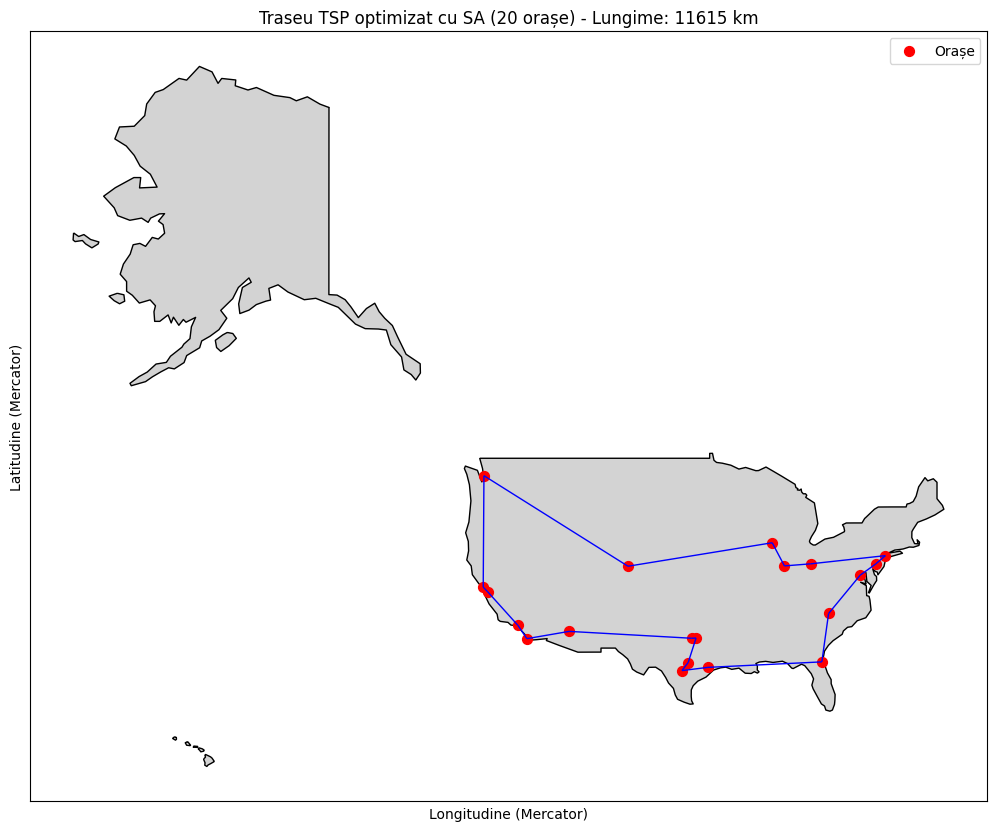

In [ ]:
# --- Vizualizare (Opțional, dar util) ---
print("\n--- Generare hartă traseu ---")

# Creăm un DataFrame pandas cu datele orașelor
df = pd.DataFrame({
    'City': list(cities.keys()),
    'Latitude': [coord[0] for coord in cities.values()],
    'Longitude': [coord[1] for coord in cities.values()]
})

# Convertim DataFrame în GeoDataFrame
gdf_cities = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326" # CRS pentru WGS84 (lat/lon)
)

# Încărcăm o hartă a lumii (sau a SUA) pentru context
# Folosim o hartă simplificată inclusă în geopandas
url_to_maps = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url_to_maps)
usa = world[world.ADMIN == "United States of America"].to_crs(epsg=3857) # Proiectăm în Mercator pt vizualizare mai bună

# Proiectăm și orașele în aceeași proiecție
gdf_cities = gdf_cities.to_crs(epsg=3857)

# Creăm figura și axele
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Desenăm harta SUA
usa.plot(ax=ax, color='lightgray', edgecolor='black')

# Desenăm punctele orașelor
gdf_cities.plot(ax=ax, color='red', markersize=50, label='Orașe')

# Desenăm traseul optim găsit de SA
from shapely.geometry import LineString

# Obținem coordonatele proiectate în ordinea traseului
route_coords = [gdf_cities.loc[gdf_cities['City'] == city, 'geometry'].iloc[0] for city in state]

# Adăugăm primul oraș la sfârșit pentru a închide ciclul
route_coords.append(route_coords[0])

# Creăm linii între orașele consecutive
for i in range(len(state)):
     point1 = route_coords[i]
     point2 = route_coords[i+1] # Folosim lista extinsă route_coords
     line = LineString([point1, point2])
     gpd.GeoSeries([line]).plot(ax=ax, color='blue', linewidth=1)

# Adăugăm etichete (opțional, pot aglomera harta)
# for x, y, label in zip(gdf_cities.geometry.x, gdf_cities.geometry.y, gdf_cities.City):
#     ax.text(x+50000, y+50000, label, fontsize=8) # Ajustăm offsetul după nevoie

# Setăm limitele hărții și titlul
# ax.set_xlim(-1.4e7, -0.7e7) # Ajustați limitele pentru a centra pe SUA continentală
# ax.set_ylim(0.25e7, 0.7e7)
ax.set_title(f"Traseu TSP optimizat cu SA ({len(cities)} orașe) - Lungime: {e:.0f} km")
ax.set_xlabel("Longitudine (Mercator)")
ax.set_ylabel("Latitudine (Mercator)")
ax.legend()
plt.xticks([]) # Ascundem axele numerice pt o mai bună claritate
plt.yticks([])
plt.show()

## 3. Comparație TS vs SA

| Caracteristică        | Căutare Tabu (TS)                     | Călire Simulată (SA)                      |
| :-------------------- | :------------------------------------ | :---------------------------------------- |
| **Natura mutării**    | Deterministică (cel mai bun ne-tabu)  | Probabilistică                            |
| **Mecanism anti-ciclu/local optima** | Memorie (lista tabu)                 | Acceptare mutări slabe (probabilitate) |
| **Parametri cheie**   | `maxTabuSize` (durata tabu)          | `T` (temperatura), Program de răcire      |
| **Comportament**      | Mai sistematic în explorare           | Mai aleatoriu la început, convergent la sfârșit |
| **Dependența de istoric** | Directă (lista tabu)               | Indirectă (prin starea curentă)           |
| **Garanții teoretice**| Convergență la optim local (fără aspirație) | Convergență la optim global (răcire log.) |
| **Implementare**      | Necesită gestionarea listei tabu     | Necesită gestionarea temperaturii         |

Ambele metode sunt puternice și alegerea între ele depinde adesea de specificul problemei și de ușurința implementării/parametrizării pentru acea problemă. Există și variante hibride care combină elemente din ambele.



## 4. Abordări hibride: combinând punctele forte

Deși Căutarea Tabu și Călirea Simulată sunt metode puternice individual, potențialul lor poate fi amplificat prin **abordări hibride**, care integrează strategic elemente din ambele tehnici (sau chiar și din alte metaheuristici). Ideea fundamentală este de a compensa aspecte ale unei metode cu punctele forte ale celeilalte, obținând astfel un algoritm mai robust și mai eficient pentru probleme de optimizare deosebit de complexe. O strategie frecventă este utilizarea capacității SA de explorare globală (datorită acceptării soluțiilor mai slabe la început) pentru a identifica regiuni promițătoare ale spațiului de căutare, urmată de aplicarea TS pentru o intensificare locală riguroasă (folosind memoria pe termen scurt pentru a evita ciclarea și a rafina soluțiile în acele regiuni).

**Exemple**

În probleme complexe de rutare a vehiculelor electrice cu ferestre de timp și rate de încărcare mixte (ETSPTW-MCR), o abordare hibridă SA/TS a demonstrat performanțe superioare. În acest caz, SA este folosit pentru diversificare (explorarea unor soluții foarte diferite), în timp ce TS intensifică căutarea în vecinătatea soluțiilor promițătoare, rafinându-le [1].

O altă combinație interesantă integrează SA, TS și [Optimizarea prin colonii de furnici](https://en.wikipedia.org/wiki/Ant_colony_optimization_algorithms) (ACO) pentru a rezolva problema dificilă a arborelui parțial de acoperire de cost minim cu *k* noduri (k-MST), unde SA și ACO explorează spațiul, iar TS rafinează soluțiile locale [2].

Alte strategii încorporează criteriul probabilistic de acceptare al SA în cadrul TS pentru a facilita evadarea din optimi locali în probleme de localizare a facilităților [3] sau în optimizarea fluxului de putere reactivă în rețelele electrice [5].

Chiar și în planificarea orarelor universitare, algoritmi hibrizi SA-TS (precum algoritmul Fralonso) utilizează SA pentru diversificare inițială și TS pentru intensificare ulterioară [4].

Exemplele arată că sinergia, combinația dintre SA și TS poate conduce la abordări și soluții superioare și la o eficiență îmbunătățită în domenii variate precum logistica, planificarea, ingineria rețelelor și optimizarea sistemelor energetice.

**Referințe (abordări hibride):**
*   **[1]** SA/TS pentru ETSPTW-MCR: https://www.sciencedirect.com/science/article/pii/S0957417419303732
*   **[2]** SA-ACO-TS pentru k-MST: https://thesai.org/Downloads/Volume12No2/Paper_88-Hybrid_Approaches_based_on_Simulated_Annealing.pdf
*   **[3]** TS-SA pentru Location-Protection-Disruption: https://www.sciencedirect.com/science/article/abs/pii/S1568494621009698
*   **[4]** Algoritmul Fralonso (SA-TS) pentru Orar: https://www.patatconference.org/patat2008/proceedings/Alonso-Pecina-WA1a.pdf
*   **[5]** TS-SA pentru Optimizarea Puterii Reactive: https://content.iospress.com/articles/informatica/infor471

# Exerciții

1.  **Analiză Comparativă TS:** Scrieți o scurtă caracterizare comparativă (4-5 paragrafe) a metodei căutării tabu pe baza articolului ["Tabu Search: A Comparative Study"](https://www.researchgate.net/publication/221787181_Tabu_Search_A_Comparative_Study). Care este diferența esențială față de celelalte metode discutate în articol (consultați Tabelul 3.1 și secțiunile relevante)? Concentrați-vă pe aspectul de memorie utilizată de TS.
<i>
  Metoda Tabu Search (TS) se diferențiază clar de celelalte metaeuristici prin faptul că folosește memorie adaptivă. Această memorie o ajută să evite revenirea la soluții deja vizitate, păstrând o listă tabu care blochează anumite mișcări pentru un număr de pași.

  Spre deosebire de TS, metodele ca Simulated Annealing (SA) sau Genetic Algorithms (GA) nu folosesc memorie — deciziile lor nu țin cont de traseul anterior, ci se bazează pe probabilități sau evoluții aleatorii. TS este mai „inteligentă” în acest sens, pentru că își amintește și folosește informațiile în căutarea de soluții mai bune.

  TS este singura metodă care are atributul de memorie adaptivă (A), pe când celelalte sunt fără memorie (M). Asta îi permite lui TS să combine eficient explorarea de soluții noi cu revenirea în zone promițătoare.

  În concluzie, avantajul principal al TS față de celelalte metode este exact această strategie de memorare, care o face mai stabilă, mai direcționată și adesea mai eficientă în probleme complexe.</i><br>


2.  **QUBO cu `dwave-tabu`:** Implementați și obțineți soluția cu [`dwave-tabu`](https://docs.ocean.dwavesys.com/projects/tabu/en/latest/) pentru un alt exemplu de model QUBO descris în ["A Tutorial on Formulating and Using QUBO Models"](https://arxiv.org/pdf/1811.11538.pdf) (alegeți unul diferit de cele prezentate în laborator, de exemplu Max-Cut sau Number Partitioning, dar cu un set diferit de date/graf). Prezentați modelul ales, formularea QUBO și rezultatul obținut.

3.  **Convergența SA:** Conform articolului ["On the Convergence Time of Simulated Annealing"](https://core.ac.uk/download/pdf/76359167.pdf), ce se poate afirma despre convergența metodei SA către optimul global? Ce condiții trebuie îndeplinite (în special legate de programul de răcire) și care este complexitatea teoretică a timpului de convergență?

  <i>Conform articolului „On the Convergence Time of Simulated Annealing”, metoda SA este garantată să ajungă în final la soluția optimă globală, dar doar în limită, adică după un timp foarte lung, cu probabilitate 1. Cu alte cuvinte, dacă rulezi SA suficient de mult timp, va găsi soluția cea mai bună.

  Autorul propune o altă definiție a convergenței: consideră că algoritmul a „convergit” dacă lanțul Markov a trecut măcar o dată printr-o soluție optimă globală, nu neapărat dacă rămâne acolo. Această abordare e mai practică, mai ales când vrem doar să știm dacă am găsit sau nu o soluție bună.

  Ca să se asigure această convergență, contează câțiva factori: temperatura minimă T, diferența maximă de cost A, diametrul D al grafului de stări și gradul d. Chiar dacă nu contează ce program de răcire se folosește, timpul de convergență e cam de ordinul 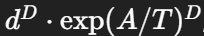
adică poate fi foarte mare în funcție de problemă.

  În concluzie, teoretic SA ajunge la soluția optimă, dar în practică, trebuie să avem grijă cum alegem temperatura și cât timp rulăm algoritmul, altfel s-ar putea să nu o vedem niciodată.</i>
  <br>

4.  **Programe de răcire SA:** Care [programe de răcire (cooling schedules)](https://www.researchgate.net/publication/282449315_A_Comparative_Study_of_Simulated_Annealing_with_different_Cooling_Schedules_for_Geometric_Optimization_of_a_Heat_Transfer_Problem_According_to_Constructal_Design) sunt cel mai des folosite în practică? La ce tipuri de probleme (caracteristici ale spațiului de căutare/funcției obiectiv) se pretează programele de răcire mai lente vs. cele mai rapide?<br>
  <i>Cele mai folosite programe de răcire în SA sunt: Exponential, Boltzmann și Fast. Dintre ele, Fast e cel mai rapid, dar și cel mai slab — în probleme complexe nu dă rezultate bune, pentru că răcește prea repede și algoritmul nu are timp să caute bine
  Programele mai lente, cum e Boltzmann sau cele hibride (ca ConstExp2), sunt mai potrivite pentru probleme cu multe minime locale. Ele păstrează temperatura ridicată mai mult timp și permit explorarea mai bună a soluțiilor
  Cel mai bun rezultat l-a avut ConstExp2, care a găsit soluția optimă globală în peste 60% din cazuri. În concluzie, pentru probleme grele, e mai bine să alegi o răcire lentă și controlată.</i><br>

5.  **Analogia cangurului:** Conform [acestei](https://page.mi.fu-berlin.de/prechelt/Biblio/kangaroo_analogy.html) analogii amuzante, cum este descrisă dinamica călirii simulate? Care sunt elementele analogiei (cangur, teren, buzunar, vreme) și cum corespund ele componentelor algoritmului SA?<br>
  <i>Analogia cangurului descrie metoda Simulated Annealing într-un mod amuzant. Cangurul e algoritmul SA. La început e „beat” și sare în toate direcțiile, adică face mutări aleatorii prin spațiul de căutare. Terenul e ca un peisaj montan, cu multe dealuri și văi — fiecare punct fiind o posibilă soluție, unele mai bune, altele mai rele.

  Pe măsură ce cangurul „se trezește” (adică scade temperatura), el începe să sară mai atent, în special în sus — adică acceptă mai greu soluții mai slabe și caută să urce spre vârful muntelui (soluția optimă). Vremea simbolizează temperatura: la început e cald (salturi mari și haotice), apoi se răcește (salturi mai mici, mai direcționate).

  Ideea e că, la început, algoritmul explorează mult și aleatoriu, dar cu timpul devine mai serios și se apropie tot mai mult de soluția cea mai bună.</i><br>

6.  **Optimizare cu `dual_annealing`:** Folosind [`scipy.optimize.dual_annealing`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.dual_annealing.html), găsiți optimele globale pentru funcțiile studiate în Laboratorul 1 (funcția Sferă, funcția Rastrigin, funcția Ackley). Folosiți codul exemplu de mai jos, adaptând definiția funcției `func` și limitele `lw` (lower) și `up` (upper) corespunzătoare domeniului fiecărei funcții.
    ```python
      import numpy as np
      from scipy.optimize import dual_annealing

      # Exemplu pentru funcția Rastrigin 2D
      func = lambda x: (x[0]**2 - 10 * np.cos(2 * np.pi * x[0])) + (x[1]**2 - 10 * np.cos(2 * np.pi * x[1])) + 20
      lw = [-5.12] * 2 # Limite inferioare pentru x0, x1
      up = [5.12] * 2 # Limite superioare pentru x0, x1
      bounds = list(zip(lw, up)) # Format necesar pentru dual_annealing

      print("Optimizare funcție Rastrigin (2D)...")
      result = dual_annealing(func, bounds)

      print("Soluție găsită (x):", result.x)
      print("Valoarea funcției (min):", result.fun)
      print("Număr evaluări funcție:", result.nfev)
      print("Număr iterații:", result.nit)
    ```
    
      a) Cum se compară performanța (`dual_annealing` vs. *hill climbing*-ul simplu implementat în Lab 1) în ceea ce privește găsirea optimului global, în special pentru funcțiile multimodale (Rastrigin, Ackley)? De ce apare această diferență?

      b) Prin ce diferă algoritmul `dual_annealing` din SciPy față de algoritmul SA clasic descris în acest laborator? (Consultați documentația SciPy și eventual [articolul original despre Dual Annealing](https://doi.org/10.1023/A:1008220013969)).

7.  **TSP România:** Rezolvați problema comis voiajorului pentru [municipiile reședință de județ și municipiile de rang 0 și 1 din România](https://ro.wikipedia.org/wiki/Municipiile_României#Lista_municipiilor_din_România) (obțineți coordonatele geografice aproximative pentru fiecare, de exemplu de pe Wikipedia sau OpenStreetMap).
    a) Implementați soluția folosind biblioteca `simanneal` (similar exemplului din laborator).

    b) *Opțional Avansat:* Încercați să rezolvați aceeași problemă folosind o implementare de Căutare Tabu pentru TSP (de exemplu, adaptați codul din [acest repository GitHub](https://github.com/polatbilek/Tabu-search-on-Travelling-Salesman-Problem) sau găsiți o altă bibliotecă/implementare). Comparați rezultatele (calitatea soluției, timpul de execuție) obținute cu SA și TS pentru aceleași date de intrare și un timp de rulare aproximativ similar.

8.  ***Implementare proprie (opțional, punct bonus):*** Implementați de la zero (folosind doar biblioteci standard Python și `numpy`/`random`) fie metoda Căutării Tabu, fie metoda Călirii Simulate. Documentați/explicași detaliile implementprii. Aplicați implementarea pentru a rezolva una dintre problemele abordate în laborator (ex: minimizarea unei funcții simple, problema partiționării, sau o versiune mică a TSP). Demonstrați funcționalitatea și explicați alegerile făcute în implementare (structura de date pentru lista tabu, programul de răcire, funcția de generare a vecinilor etc.).

**Rezolvare Exercitiu 6**

In [1]:
#Rezolvare Ex 6
import numpy as np
from scipy.optimize import dual_annealing

def sphere(x):
    return sum([xi**2 for xi in x])

def rastrigin(x):
    return sum([xi**2 - 10 * np.cos(2 * np.pi * xi) for xi in x]) + 10 * len(x)

def ackley(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    d = len(x)
    sum1 = np.sum(np.square(x))
    sum2 = np.sum(np.cos(c * x))
    term1 = -a * np.exp(-b * np.sqrt(sum1 / d))
    term2 = -np.exp(sum2 / d)
    return term1 + term2 + a + np.exp(1)

def optimize_function(func, bounds, name):
    print(f"\nOptimizare funcție {name}...")
    result = dual_annealing(func, bounds)
    print("Soluție găsită (x):", result.x)
    print("Valoarea funcției (min):", result.fun)
    print("Număr evaluări funcție:", result.nfev)
    print("Număr iterații:", result.nit)

dim = 2

bounds_sphere = [(-5.12, 5.12)] * dim
optimize_function(sphere, bounds_sphere, "Sferă")

bounds_rastrigin = [(-5.12, 5.12)] * dim
optimize_function(rastrigin, bounds_rastrigin, "Rastrigin")

bounds_ackley = [(-5, 5)] * dim
optimize_function(ackley, bounds_ackley, "Ackley")


Optimizare funcție Sferă...
Soluție găsită (x): [-4.97590757e-09 -4.98821489e-09]
Valoarea funcției (min): 4.9641943934633325e-17
Număr evaluări funcție: 4013
Număr iterații: 1000

Optimizare funcție Rastrigin...
Soluție găsită (x): [-5.48872198e-09 -6.35650070e-09]
Valoarea funcției (min): 1.4210854715202004e-14
Număr evaluări funcție: 4121
Număr iterații: 1000

Optimizare funcție Ackley...
Soluție găsită (x): [-1.10888556e-09 -4.53562939e-10]
Valoarea funcției (min): 3.388624936206952e-09
Număr evaluări funcție: 4262
Număr iterații: 1000


a) <br>
<i>Hill climbing merge doar „în sus” spre soluții mai bune. Dacă prinde un minim local, se blochează acolo.

dual_annealing poate accepta și soluții mai slabe temporar (ca Simulated Annealing), deci poate să iasă din capcane.

Pe funcții ca Rastrigin și Ackley (cu multe minime locale), dual_annealing e mult mai bun.

Diferența apare pentru că hill climbing e local și determinist, iar dual_annealing e global și aleator.<i><br><br>
b)<br>
SA clasic are răcire simplă și mutări aleatoare.

dual_annealing folosește:

mutări mai inteligente (distribuție “visita”),

o strategie automată de temperatură,

și o fază finală de optimizare locală (L-BFGS-B).